<h2 id="Machine Learning Assignment 1">Machine Learning Assignment 1</h2>


First of all we import the needed libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

C:\AI\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\AI\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\AI\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\AI\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym

Reading the dataset

In [2]:
df = pd.read_csv('flight_delay.csv')

In [3]:
df.head(10)

,Depature Airport,Scheduled depature time,Destination Airport,Scheduled arrival time,Delay
0,SVO,2015-10-27 07:40:00,HAV,2015-10-27 20:45:00,0.0
1,SVO,2015-10-27 09:50:00,JFK,2015-10-27 20:35:00,2.0
2,SVO,2015-10-27 10:45:00,MIA,2015-10-27 23:35:00,0.0
3,SVO,2015-10-27 12:30:00,LAX,2015-10-28 01:20:00,0.0
4,OTP,2015-10-27 14:15:00,SVO,2015-10-27 16:40:00,9.0
5,HAM,2015-10-27 14:30:00,SVO,2015-10-27 17:15:00,0.0
6,SVO,2015-10-27 14:35:00,JFK,2015-10-28 01:25:00,0.0
7,DXB,2015-10-27 15:40:00,SVO,2015-10-27 21:20:00,1.0
8,SVO,2015-10-27 16:10:00,VVO,2015-10-28 00:35:00,0.0
9,TLV,2015-10-27 16:45:00,SVO,2015-10-27 20:55:00,0.0


In [4]:
types = df.dtypes
types

Depature Airport            object
Scheduled depature time     object
Destination Airport         object
Scheduled arrival time      object
Delay                      float64
dtype: object

<h2 id="Features engineering">Features engineering</h2>


In [5]:
df['Scheduled depature time'] = pd.to_datetime(df['Scheduled depature time'])
df['Scheduled arrival time'] = pd.to_datetime(df['Scheduled arrival time'])

In [6]:
df['Scheduled depature time'] = pd.to_datetime(df['Scheduled depature time'], 
 format = '%Y-%m-%d%H:%M:%S', 
 errors = 'coerce')
df['Scheduled arrival time'] = pd.to_datetime(df['Scheduled arrival time'], 
 format = '%Y-%m-%d%H:%M:%S', 
 errors = 'coerce')

In [7]:
de=df['Scheduled arrival time']-df['Scheduled depature time']
de=de.dt.total_seconds()/3600
df['flight duration']=de
df['Delay']=df['Delay']/60

In [8]:
df['Scheduled depature time_year'] = df['Scheduled depature time'].dt.year
df['Scheduled depature time_month'] = df['Scheduled depature time'].dt.month
df['Scheduled depature time_week'] = df['Scheduled depature time'].dt.week
df['Scheduled depature time_day'] = df['Scheduled depature time'].dt.day
df['Scheduled depature time_houre'] = df['Scheduled depature time'].dt.hour
df['Scheduled depature time_min'] = df['Scheduled depature time'].dt.minute
df['Scheduled depature time_dow'] = df['Scheduled depature time'].dt.dayofweek

In [9]:
df['Scheduled arrival time_year'] = df['Scheduled arrival time'].dt.year
df['Scheduled arrival time_month'] = df['Scheduled arrival time'].dt.month
df['Scheduled arrival time_week'] = df['Scheduled arrival time'].dt.week
df['Scheduled arrival time_day'] = df['Scheduled arrival time'].dt.day
df['Scheduled arrival time_houre'] = df['Scheduled arrival time'].dt.hour
df['Scheduled arrival time_min'] = df['Scheduled arrival time'].dt.minute
df['Scheduled arrival time_dow'] = df['Scheduled arrival time'].dt.dayofweek

In [10]:
df = df.drop(['Scheduled arrival time', 'Scheduled depature time'], axis=1)

In [11]:
df.head(10)

,Depature Airport,Destination Airport,Delay,flight duration,Scheduled depature time_year,Scheduled depature time_month,Scheduled depature time_week,Scheduled depature time_day,Scheduled depature time_houre,Scheduled depature time_min,Scheduled depature time_dow,Scheduled arrival time_year,Scheduled arrival time_month,Scheduled arrival time_week,Scheduled arrival time_day,Scheduled arrival time_houre,Scheduled arrival time_min,Scheduled arrival time_dow
0,SVO,HAV,0.000000,13.083333,2015,10,44,27,7,40,1,2015,10,44,27,20,45,1
1,SVO,JFK,0.033333,10.750000,2015,10,44,27,9,50,1,2015,10,44,27,20,35,1
2,SVO,MIA,0.000000,12.833333,2015,10,44,27,10,45,1,2015,10,44,27,23,35,1
3,SVO,LAX,0.000000,12.833333,2015,10,44,27,12,30,1,2015,10,44,28,1,20,2
4,OTP,SVO,0.150000,2.416667,2015,10,44,27,14,15,1,2015,10,44,27,16,40,1
5,HAM,SVO,0.000000,2.750000,2015,10,44,27,14,30,1,2015,10,44,27,17,15,1
6,SVO,JFK,0.000000,10.833333,2015,10,44,27,14,35,1,2015,10,44,28,1,25,2
7,DXB,SVO,0.016667,5.666667,2015,10,44,27,15,40,1,2015,10,44,27,21,20,1
8,SVO,VVO,0.000000,8.416667,2015,10,44,27,16,10,1,2015,10,44,28,0,35,2
9,TLV,SVO,0.000000,4.166667,2015,10,44,27,16,45,1,2015,10,44,27,20,55,1


<h2 id="Dealing with None values">Dealing with None values</h2>


In [12]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(df)
df = pd.DataFrame(imputer.transform(df), columns=df.columns)

<h2 id="Encoding">Encoding using ordinal</h2>


In [13]:
encoder = OrdinalEncoder()
ft = ['Depature Airport', 'Destination Airport']
encoder.fit(df[ft])

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [14]:
def Ordinal_e_new_features(df, features_name, encoder):
    new_feats = encoder.transform(df[features_name])
    new_cols = pd.DataFrame(new_feats, dtype=int)
    new_df = pd.concat([df, new_cols], axis=1)
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df

In [15]:
df = Ordinal_e_new_features(df, ft, encoder)

In [16]:
df=df.rename(columns={0: 'Depature Airport', 1: 'Destination Airport'})

In [17]:
df.head(10)

,Delay,flight duration,Scheduled depature time_year,Scheduled depature time_month,Scheduled depature time_week,Scheduled depature time_day,Scheduled depature time_houre,Scheduled depature time_min,Scheduled depature time_dow,Scheduled arrival time_year,Scheduled arrival time_month,Scheduled arrival time_week,Scheduled arrival time_day,Scheduled arrival time_houre,Scheduled arrival time_min,Scheduled arrival time_dow,Depature Airport,Destination Airport
0,0,13.0833,2015,10,44,27,7,40,1,2015,10,44,27,20,45,1,144,56
1,0.0333333,10.75,2015,10,44,27,9,50,1,2015,10,44,27,20,35,1,144,68
2,0,12.8333,2015,10,44,27,10,45,1,2015,10,44,27,23,35,1,144,94
3,0,12.8333,2015,10,44,27,12,30,1,2015,10,44,28,1,20,2,144,82
4,0.15,2.41667,2015,10,44,27,14,15,1,2015,10,44,27,16,40,1,113,144
5,0,2.75,2015,10,44,27,14,30,1,2015,10,44,27,17,15,1,53,144
6,0,10.8333,2015,10,44,27,14,35,1,2015,10,44,28,1,25,2,144,68
7,0.0166667,5.66667,2015,10,44,27,15,40,1,2015,10,44,27,21,20,1,35,144
8,0,8.41667,2015,10,44,27,16,10,1,2015,10,44,28,0,35,2,144,171
9,0,4.16667,2015,10,44,27,16,45,1,2015,10,44,27,20,55,1,156,144


<h2 id="Visualizing the data">Visualizing the data</h2>

<p id="visualizing">First time we use only Delay and flight duration,
Seconde one we use PCA to reduce the dimensions to 2 and in
Third one we use PCA to reduce the dimentions to 3.
</p>


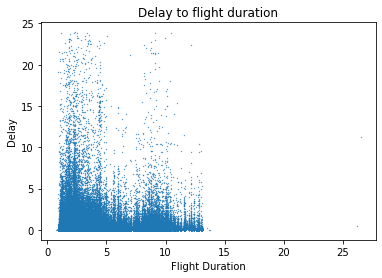

In [18]:
plt.scatter(df['flight duration'],df['Delay'],s=0.1)
plt.title("Delay to flight duration")
plt.xlabel("Flight Duration")
plt.ylabel("Delay")
plt.show()

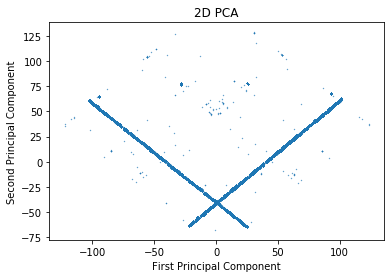

In [19]:
dim_reducer = PCA(n_components=2)
df_reduced = dim_reducer.fit_transform(df)
plt.scatter(df_reduced[:,0],df_reduced[:,1],s=0.1)
plt.title("2D PCA")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

<h2 id="Outlier Detection & Removal ">Outlier Detection & Removal </h2>

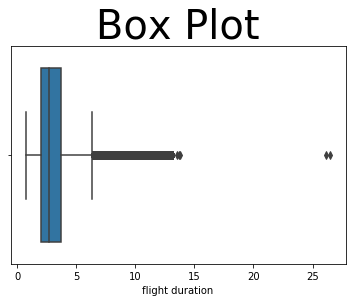

In [20]:
plt.title('Box Plot', fontsize=40)
sns.boxplot(x=df['flight duration'])

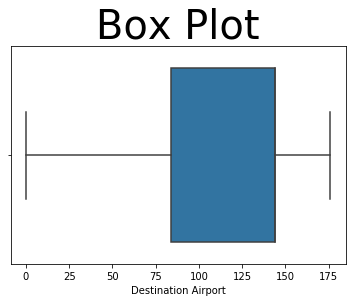

In [21]:
plt.title('Box Plot', fontsize=40)
sns.boxplot(x=df['Destination Airport'])

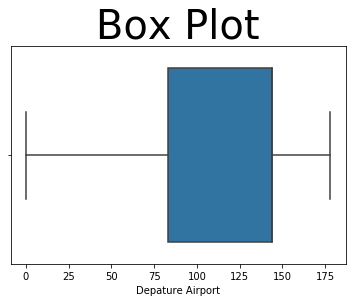

In [22]:
plt.title('Box Plot', fontsize=40)
sns.boxplot(x=df['Depature Airport'])

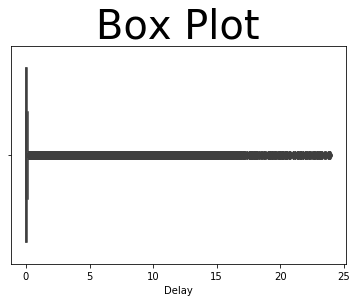

In [23]:
plt.title('Box Plot', fontsize=40)
sns.boxplot(x=df['Delay'])

We can see that we have Outlier in flight duration and delay

In [24]:
def removeOutliers(datafframe,feature):

    upper_limit = datafframe[feature].mean() + 3 * datafframe[feature].std()
    lower_limit = datafframe[feature].mean() - 3 * datafframe[feature].std()
    new_train_data = datafframe[(datafframe[feature] < upper_limit) & (datafframe[feature] > lower_limit)]

    return new_train_data

In [25]:
df=removeOutliers(df,'Delay')
df=removeOutliers(df,'flight duration')

<h2 id="Splitting to test and train">Splitting to test and train</h2>

In [26]:
train = df.loc[df['Scheduled depature time_year'] < 2018] 
test = df.loc[df['Scheduled depature time_year'] == 2018]

In [27]:
train.head(10)

,Delay,flight duration,Scheduled depature time_year,Scheduled depature time_month,Scheduled depature time_week,Scheduled depature time_day,Scheduled depature time_houre,Scheduled depature time_min,Scheduled depature time_dow,Scheduled arrival time_year,Scheduled arrival time_month,Scheduled arrival time_week,Scheduled arrival time_day,Scheduled arrival time_houre,Scheduled arrival time_min,Scheduled arrival time_dow,Depature Airport,Destination Airport
4,0.15,2.41667,2015,10,44,27,14,15,1,2015,10,44,27,16,40,1,113,144
5,0,2.75,2015,10,44,27,14,30,1,2015,10,44,27,17,15,1,53,144
7,0.0166667,5.66667,2015,10,44,27,15,40,1,2015,10,44,27,21,20,1,35,144
8,0,8.41667,2015,10,44,27,16,10,1,2015,10,44,28,0,35,2,144,171
9,0,4.16667,2015,10,44,27,16,45,1,2015,10,44,27,20,55,1,156,144
10,0,3.5,2015,10,44,27,16,55,1,2015,10,44,27,20,25,1,100,144
11,0,8.75,2015,10,44,27,17,0,1,2015,10,44,28,1,45,2,144,119
12,0.233333,2.25,2015,10,44,27,17,10,1,2015,10,44,27,19,25,1,144,98
13,0,8.33333,2015,10,44,27,17,25,1,2015,10,44,28,1,45,2,144,160
14,0,3.66667,2015,10,44,27,17,35,1,2015,10,44,27,21,15,1,12,144


In [28]:
y_test=test['Delay']
x_test=test[['flight duration']]
X_test=test.drop('Delay',axis=1)
y_train=train['Delay']
x_train=train[['flight duration']]
X_train=train.drop('Delay',axis=1)

<h2 id="Scale the data">Scale the data</h2>

In [29]:
scaler = RobustScaler()
scaler.fit_transform(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [30]:
x_train=x_train.reshape(-1, 1)
x_test=x_test.reshape(-1,1)

<h2 id="Simple Linear Regression">Simple Linear Regression</h2>

In [31]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print(f"Model intercept : {regressor.intercept_}")
print(f"Model coefficient : {regressor.coef_}")

y_pred = regressor.predict(x_test)

Model intercept : 0.1114359938095183
Model coefficient : [0.02499832]


In [32]:
print('test')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2-score:', r2_score(y_test,y_pred ) )

test
Mean Absolute Error: 0.13913077824858922
Mean Squared Error: 0.049476033990883246
Root Mean Squared Error: 0.2224320884919333
R2-score: -0.07113407844319952


In [33]:
print('train')
y_pred = regressor.predict(x_train)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('R2-score:', r2_score(y_train,y_pred ) )

train
Mean Absolute Error: 0.15353954967761002
Mean Squared Error: 0.07668975868353019
Root Mean Squared Error: 0.2769291582400275
R2-score: 0.0074995522349310395


Text(0, 0.5, 'Delay')

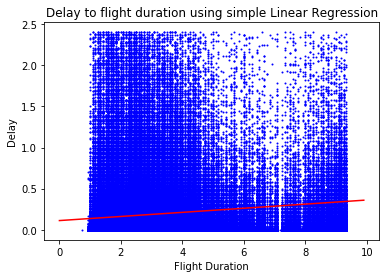

In [34]:
plt.scatter(df['flight duration'], df['Delay'],  color='blue',s=1)
XX = np.arange(0.0, 10.0, 0.1)
yy = regressor.intercept_+ regressor.coef_[0]*XX
plt.plot(XX, yy, '-r' )
plt.title("Delay to flight duration using simple Linear Regression")

plt.xlabel("Flight Duration")
plt.ylabel("Delay")

<h2 id="Multiple Linear Regression">Multiple Linear Regression</h2>

In [35]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(f"Model intercept : {regressor.intercept_}")
print(f"Model coefficients : {regressor.coef_}")

y_pred = regressor.predict(X_test)

Model intercept : 0.11219626246058768
Model coefficients : [ 2.73239865e-02  1.79851234e+00  8.20786411e-01  4.89739524e-03
  7.74912059e-02  2.77614691e-02  5.37310913e-03 -6.30951731e-03
 -1.78741826e+00 -8.17549316e-01 -1.08706272e-03 -8.64865799e-02
  6.52340420e-03  1.43408027e-03  9.38006534e-03 -5.62356910e-03
  1.25828914e-02]


In [36]:
print('test')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2-score:', r2_score(y_test,y_pred ) )

test
Mean Absolute Error: 0.15062395424884317
Mean Squared Error: 0.051631411584780774
Root Mean Squared Error: 0.2272254642085274
R2-score: -0.1177970424382917


In [37]:
print('train')
y_pred = regressor.predict(X_train)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('R2-score:', r2_score(y_train,y_pred ) )

train
Mean Absolute Error: 0.1521426454561674
Mean Squared Error: 0.07616428722157337
Root Mean Squared Error: 0.27597878038279205
R2-score: 0.014300077757929075


<h2 id="Lasso & Ridge with regularization">Lasso & Ridge with regularization</h2>

0.049751911278284766
0.049751911278284766
0.049751911278284766
0.049751911278284766
0.049751911278284766
0.049751911278284766
0.049751911278284766
0.049751911278284766
0.049751911278284766


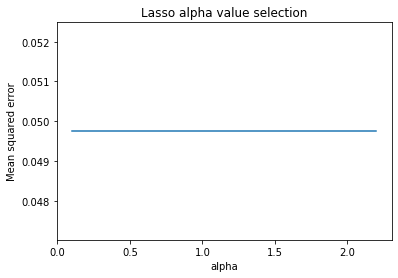

test
Mean Absolute Error: 0.14059513769055443
Mean Squared Error: 0.049751911278284766
Root Mean Squared Error: 0.2230513646635787
R2-score: -0.07710669872352938
train
Mean Absolute Error: 0.15523564675279844
Mean Squared Error: 0.0772692434106419
Root Mean Squared Error: 0.27797345810462176
R2-score: 0.0
Best value of alpha: 2.2


In [55]:
alphas = [2.2, 2, 1.5, 1.3, 1.2, 1.1, 1, 0.3, 0.1]
losses = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(mse)
    losses.append(mse)
plt.plot(alphas, losses)
plt.title("Lasso alpha value selection")
plt.xlabel("alpha")
plt.ylabel("Mean squared error")
plt.show()

best_alpha = alphas[np.argmin(losses)]
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print('test')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2-score:', r2_score(y_test,y_pred ) )
y_pred = lasso.predict(X_train)
print('train')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('R2-score:', r2_score(y_train,y_pred ) )
print("Best value of alpha:", best_alpha)

0.04947603261050793
0.04947603273599491
0.049476033049713805
0.04947603317520195
0.04947603323794618
0.04947603330069047
0.04947603336343483
0.049476033802647854
0.04947603392813804


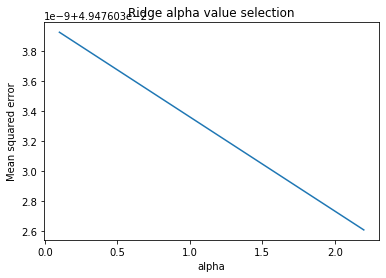

test
Mean Absolute Error: 0.15062260608459946
Mean Squared Error: 0.051631199546090016
Root Mean Squared Error: 0.22722499762589946
R2-score: -0.11779245189516807
train
Mean Absolute Error: 0.1521426884069587
Mean Squared Error: 0.07616433015671112
Root Mean Squared Error: 0.2759788581698082
R2-score: 0.014299522101682838
Best value of alpha: 2.2


In [57]:
alphas = [2.2, 2, 1.5, 1.3, 1.2, 1.1, 1, 0.3, 0.1]
losses = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    y_pred = ridge.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    print(mse)
    losses.append(mse)
plt.plot(alphas, losses)
plt.title("Ridge alpha value selection")
plt.xlabel("alpha")
plt.ylabel("Mean squared error")
plt.show()

best_alpha = alphas[np.argmin(losses)]
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print('test')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2-score:', r2_score(y_test,y_pred ) )
y_pred = ridge.predict(X_train)
print('train')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('R2-score:', r2_score(y_train,y_pred ) )
print("Best value of alpha:", best_alpha)

<h2 id="Polynomial Regression with one feature (flight duration)">Polynomial Regression with one feature (flight duration)</h2>

In [40]:
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(x_train)
train_x_poly

array([[ 1.00000e+00, -1.50000e-01,  2.25000e-02],
       [ 1.00000e+00,  5.00000e-02,  2.50000e-03],
       [ 1.00000e+00,  1.80000e+00,  3.24000e+00],
       ...,
       [ 1.00000e+00,  3.70000e+00,  1.36900e+01],
       [ 1.00000e+00,  7.00000e-01,  4.90000e-01],
       [ 1.00000e+00,  3.65000e+00,  1.33225e+01]])

In [41]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, y_train)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [0.         0.01841862 0.00298728]
Intercept:  0.11001860230494646


In [42]:
test_x_poly = poly.fit_transform(x_test)
test_y_ = clf.predict(test_x_poly)
print('test')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_y_))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_y_))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_y_)))
print('R2-score:', r2_score(y_test,test_y_ ) )

test
Mean Absolute Error: 0.13904087761000886
Mean Squared Error: 0.04942336718537309
Root Mean Squared Error: 0.222313668462767
R2-score: -0.06999386558387721


In [43]:
test_x_poly = poly.fit_transform(x_train)
test_y_ = clf.predict(test_x_poly)
print('train')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, test_y_))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, test_y_))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, test_y_)))
print('R2-score:', r2_score(y_train,test_y_ ) )

train
Mean Absolute Error: 0.15353509334506463
Mean Squared Error: 0.07666977742470296
Root Mean Squared Error: 0.2768930794091881
R2-score: 0.007758144890239516


Text(0, 0.5, 'Delay')

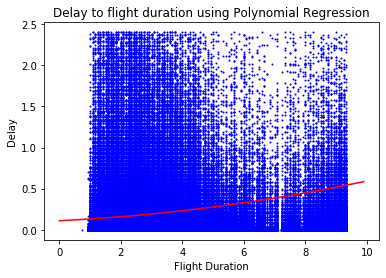

In [44]:
plt.scatter(df['flight duration'], df['Delay'],  color='blue',s=1)
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_+ clf.coef_[1]*XX+ clf.coef_[2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.title("Delay to flight duration using Polynomial Regression")
plt.xlabel("Flight Duration")
plt.ylabel("Delay")

<h2 id="Polynomial Regression with all features">Polynomial Regression with all features</h2>

In [45]:
poly_all = PolynomialFeatures(degree=2)
train_x_poly_all = poly_all.fit_transform(X_train)
train_x_poly_all

array([[ 1.        , -0.15      , -1.        , ...,  0.25826391,
        -0.        ,  0.        ],
       [ 1.        ,  0.05      , -1.        , ...,  2.22547702,
        -0.        ,  0.        ],
       [ 1.        ,  1.8       , -1.        , ...,  3.19295888,
        -0.        ,  0.        ],
       ...,
       [ 1.        ,  3.7       ,  1.        , ...,  0.        ,
        -0.        ,  4.48027778],
       [ 1.        ,  0.7       ,  1.        , ...,  0.        ,
        -0.        ,  1.73361111],
       [ 1.        ,  3.65      ,  1.        , ...,  0.        ,
        -0.        ,  0.66694444]])

In [46]:
clf_all = linear_model.LinearRegression()
train_y_all = clf_all.fit(train_x_poly_all, y_train)
# The coefficients
print ('Coefficients: ', clf_all.coef_)
print ('Intercept: ',clf_all.intercept_)

Coefficients:  [ 1.81983197e+06  7.00222092e+08 -1.26641494e+10 -1.49623842e+11
  4.66258796e+10 -2.38518759e+09  4.62146581e+09  2.10066628e+08
  9.73279990e+08  1.26650815e+10  1.49626245e+11 -4.66320085e+10
  2.39527001e+09 -4.62146581e+09 -2.10066628e+08 -7.93830309e+08
 -9.91821289e-05  2.04734802e-02 -6.34234868e+07 -7.61889273e+08
  5.95004528e+09 -1.02525519e+09 -1.39610371e+08 -8.37190026e+08
 -3.80540921e+07  2.98397081e+07  7.62471841e+08 -5.94854323e+09
  1.02142458e+09  1.45911889e+08  8.37190026e+08  3.80540921e+07
  8.23163426e+07 -1.86238289e-02  4.41551208e-03  1.85098192e+10
 -1.79857936e+10  1.88109861e+10 -4.81266681e+09 -5.02846915e+09
 -2.28566785e+08  2.71579827e+09 -3.57750834e+10  2.84487450e+10
 -2.13895994e+10  1.25501294e+10  5.02846920e+09  2.28566782e+08
 -5.39591612e+09  8.98254395e-01  2.19858551e+00  9.32625587e+08
  4.62720305e+09 -2.63193253e+10  3.92702989e+10  1.78501358e+09
  9.79302919e+07  1.79857935e+10 -1.86524606e+09 -4.62720825e+09
 -4.556923

In [47]:
test_x_poly_all = poly.fit_transform(X_test)
test_y_all = clf_all.predict(test_x_poly_all)
print('test')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_y_all))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_y_all))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_y_all)))
print('R2-score:', r2_score(y_test,test_y_all ) )

test
Mean Absolute Error: 0.3290183549376639
Mean Squared Error: 0.12630430632716708
Root Mean Squared Error: 0.3553931714695248
R2-score: -1.7344319228595975


In [48]:
test_x_poly_all = poly.fit_transform(X_train)
test_y_all = clf_all.predict(test_x_poly_all)
print('train')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, test_y_all))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, test_y_all))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, test_y_all)))
print('R2-score:', r2_score(y_train,test_y_all ) )

train
Mean Absolute Error: 0.15008197166321988
Mean Squared Error: 0.07531060159866002
Root Mean Squared Error: 0.27442777118699196
R2-score: 0.025348272165327534


<h2 id="Using Neural Networks">Using Neural Networks</h2>

In [49]:
model2 = Sequential()
model2.add(Dense(16, input_dim=17, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='relu'))
model2.compile(loss='mean_absolute_error',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [50]:
model2.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
477762/477762 [==============================] - 14s 30us/sample - loss: 0.1175 - acc: 0.5153
Epoch 2/5
477762/477762 [==============================] - 14s 29us/sample - loss: 0.1172 - acc: 0.5155
Epoch 3/5
477762/477762 [==============================] - 14s 29us/sample - loss: 0.1172 - acc: 0.5155
Epoch 4/5
477762/477762 [==============================] - 14s 30us/sample - loss: 0.1172 - acc: 0.5155
Epoch 5/5
477762/477762 [==============================] - 14s 30us/sample - loss: 0.1172 - acc: 0.5155


In [51]:
predicted = model2.predict(X_test, batch_size=128)

In [52]:
print('test')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R2-score:', r2_score(y_test,predicted ) )

test
Mean Absolute Error: 0.05749415482946202
Mean Squared Error: 0.049495905443351765
Root Mean Squared Error: 0.22247675259080837
R2-score: -0.07156428653003033


In [53]:
predicted = model2.predict(X_train, batch_size=128)

In [54]:
print('train')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, predicted)))
print('R2-score:', r2_score(y_train,predicted ) )

train
Mean Absolute Error: 0.11717316013691612
Mean Squared Error: 0.09099879286711328
Root Mean Squared Error: 0.3016600617700548
R2-score: -0.177684533333744
